# Explore how data is loaded in the fewshotbench

## Orginial folder structure and data loading script (utils.py)

In [1]:
from fewshotbench_v2.datasets.cell.utils import *
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!tree -L 3 fewshotbench_v2/

fewshotbench_v2/
├── LICENSE
├── README.md
├── backbones
│   ├── blocks.py
│   ├── conv.py
│   ├── fcnet.py
│   └── resnet.py
├── conf
│   ├── dataset
│   │   ├── classification_base.yaml
│   │   ├── swissprot.yaml
│   │   └── tabula_muris.yaml
│   ├── main.yaml
│   └── method
│       ├── baseline.yaml
│       ├── baseline_pp.yaml
│       ├── maml.yaml
│       ├── matchingnet.yaml
│       ├── meta_base.yaml
│       ├── method_base.yaml
│       └── protonet.yaml
├── data
│   └── tabula_muris
│       ├── gene_association.mgi
│       ├── go-basic.obo
│       └── tabula-muris-comet.h5ad
├── datasets
│   ├── __init__.py
│   ├── __pycache__
│   │   ├── __init__.cpython-310.pyc
│   │   └── __init__.cpython-311.pyc
│   ├── cell
│   │   ├── __pycache__
│   │   ├── tabula_muris.py
│   │   └── utils.py
│   ├── dataset.py
│   └── prot
│       ├── __init__.py
│       ├── swissprot.py
│       └── utils.py
├── environment.yml
├── go-basic.obo
├── methods
│   ├── __init__.py
│   ├── baseline.py
│   ├─

In [3]:
!cat fewshotbench_v2/datasets/cell/utils.py

import numpy as np
import pandas as pd
import scanpy as sc
from anndata import read_h5ad


class MacaData():
    def __init__(self, annotation_type='cell_ontology_class_reannotated',
                 src_file='dataset/cell_data/tabula-muris-senis-facs-official-annotations.h5ad', filter_genes=True):

        """
        annotation type: cell_ontology_class, cell_ontology id or free_annotation
        """
        self.adata = read_h5ad(src_file)
        self.adata.obs[annotation_type] = self.adata.obs[annotation_type].astype(str)
        self.adata = self.adata[self.adata.obs[annotation_type] != 'nan', :]
        self.adata = self.adata[self.adata.obs[annotation_type] != 'NA', :]

        # print(Counter(self.adata.obs.loc[self.adata.obs['age']=='18m', 'free_annotation']))

        self.cells2names = self.cellannotation2ID(annotation_type)

        if filter_genes:
            sc.pp.filter_genes(self.adata, min_cells=5)

        self.adata = self.preprocess_data(self.adata)

    def prep

## Adata pre-processing 

In [5]:
# read data 
data_dir = 'fewshotbench_v2/data/tabula_muris/'
src_file = os.path.join(data_dir, "tabula-muris-comet.h5ad")
adata = read_h5ad(src_file)

# since this adata is small, we can visualize the sparse martix 
# rows: cells; columns: genes
adata.to_df()

index,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
index,,,,,,,,,,,,,,,,,,,,,
A10_B000235_B007504_S10.mm10-plus-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10_B000497_B009023_S10.mm10-plus-0-0,0.0,15.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10_B000524_B009242_S10.mm10-plus-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10_B000756_B007446_S10.mm10-plus-0-0,0.0,815.0,4.0,0.0,236.0,0.0,0.0,0.0,0.0,0.0,...,54.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
A10_B000802_B009022_S10.mm10-plus-0-0,0.0,0.0,0.0,0.0,125.0,23.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,291.0,0.0,0.0,0.0,87.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9_B000485_S69.mus-2-1,0.0,386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,105.0,0.0,0.0,0.0,0.0,0.0
P9_B000492_S153.mus-2-1,0.0,364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P9_B000956_S237.mus-2-1,0.0,1.0,0.0,38.0,0.0,0.0,79.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0


### Get cell type annotation 

In [6]:
adata.obs

,FACS.selection,age,batch,cell,cell_ontology_class,cell_ontology_id,cellid,free_annotation,method,mouse.id,plate,sex,subtissue,tissue,well,cell_ontology_class_reannotated,free_annotation_reannotated
index,,,,,,,,,,,,,,,,,
A10_B000235_B007504_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000235,nan,facs,18_53_M,B000235,male,Thymus Epithelium,Thymus,A10,nan,nan
A10_B000497_B009023_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000497,nan,facs,18_53_M,B000497,male,nan,Skin,A10,bulge keratinocyte,nan
A10_B000524_B009242_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000524,nan,facs,18_53_M,B000524,male,nan,Trachea,A10,nan,nan
A10_B000756_B007446_S10.mm10-plus-0-0,Viable,18m,0,nan,nan,nan,A10_B000756,nan,facs,18_45_M,B000756,male,Endocrine,Pancreas,A10,pancreatic B cell,pancreatic B cell
A10_B000802_B009022_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000802,nan,facs,18_47_F,B000802,female,Skin Anagen,Skin,A10,bulge keratinocyte,outer bulge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9_B000485_S69.mus-2-1,Multiple,18m,1,P9_B000485_S69.mus,nan,NA,nan,basal cell,facs,18_47_F,B000485,female,Mammary_Gland,Mammary_Gland,P9,basal cell,basal cell
P9_B000492_S153.mus-2-1,Multiple,18m,1,P9_B000492_S153.mus,nan,NA,nan,nan,facs,18_46_F,B000492,female,Mammary_Gland,Mammary_Gland,P9,basal cell,basal cell
P9_B000956_S237.mus-2-1,Multiple,21m,1,P9_B000956_S237.mus,nan,NA,nan,nan,facs,21_48_F,B000956,female,Mammary_Gland,Mammary_Gland,P9,nan,nan


In [7]:
# in the provided utils.py, they selected the column 'cell_ontology_class_reannotated' as the ground truth label 
annotation_type='cell_ontology_class_reannotated'

## step 1: remove cells that do not have annotation 
adata.obs[annotation_type] = adata.obs[annotation_type].astype(str)
adata = adata[adata.obs[annotation_type] != 'nan', :]
adata = adata[adata.obs[annotation_type] != 'NA', :]

# step 2: get the unique cell types 
annotations = list(adata.obs[annotation_type])
annotations_set = sorted(set(annotations))
print("Number of unique cell types", len(annotations_set))
print("Example cell types:", annotations_set[0:5])

# step 3: change the cell type to label (i.e a mapping from label to class index 0, 1, 2 ...)
mapping = {a: idx for idx, a in enumerate(annotations_set)}
truth_labels = [mapping[a] for a in annotations]
adata.obs['label'] = pd.Categorical(values=truth_labels)

adata.obs

Number of unique cell types 124
Example cell types: ['B cell', 'Bergmann glial cell', 'Brush cell of epithelium proper of large intestine', 'CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell']


,FACS.selection,age,batch,cell,cell_ontology_class,cell_ontology_id,cellid,free_annotation,method,mouse.id,plate,sex,subtissue,tissue,well,cell_ontology_class_reannotated,free_annotation_reannotated,label
index,,,,,,,,,,,,,,,,,,
A10_B000497_B009023_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000497,nan,facs,18_53_M,B000497,male,nan,Skin,A10,bulge keratinocyte,nan,28
A10_B000756_B007446_S10.mm10-plus-0-0,Viable,18m,0,nan,nan,nan,A10_B000756,nan,facs,18_45_M,B000756,male,Endocrine,Pancreas,A10,pancreatic B cell,pancreatic B cell,97
A10_B000802_B009022_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000802,nan,facs,18_47_F,B000802,female,Skin Anagen,Skin,A10,bulge keratinocyte,outer bulge,28
A10_B000927_B007456_S10.mm10-plus-0-0,"CD31+, CD45+, CD31-CD45-Sca1+, CD31-CD45-Sca1-...",18m,0,nan,nan,nan,A10_B000927,nan,facs,18_46_F,B000927,female,Muscle Diaphragm,Limb_Muscle,A10,skeletal muscle satellite cell,skeletal muscle satellite cell,113
A10_B001361_B007505_S10.mm10-plus-0-0,Viable,18m,0,nan,nan,nan,A10_B001361,nan,facs,18_46_F,B001361,female,RV,Heart,A10,B cell,B cell,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8_MAA001690_S20.mus-2-1,Multiple,21m,1,P8_MAA001690_S20.mus,basal cell,NA,nan,basal cell,facs,21_54_F,MAA001690,female,Mammary_Gland,Mammary_Gland,P8,basal cell,basal cell,20
P8_MAA001700_S104.mus-2-1,Multiple,21m,1,P8_MAA001700_S104.mus,basal cell,NA,nan,basal cell,facs,21_55_F,MAA001700,female,Mammary_Gland,Mammary_Gland,P8,basal cell,basal cell,20
P9_B000485_S69.mus-2-1,Multiple,18m,1,P9_B000485_S69.mus,nan,NA,nan,basal cell,facs,18_47_F,B000485,female,Mammary_Gland,Mammary_Gland,P9,basal cell,basal cell,20


### Quality control

The QC step usually consists of 
1. Filter out cell outliers based on counts and number of gene express. [sc.pp.filter_cells](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.filter_cells.html)
   - n_gene: cell1 have gene expression of gene1, gene2, gene5, gene10 ... --> n_gene is how many genes are expressed/measured in cell1.
   - n_count: cell1 have 1 count for gene1, 2 counts for gene2, 10 counts for gene5, 7 counts for gene10 ... --> n_count is all counts added for cell1.
3. Normalize each cell by total counts over all genes, so that every cell has the same total count after normalization.[sc.pp.normalize_per_cell](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.normalize_per_cell.html)
4. Extract highly variable genes [sc.pp.filter_genes_dispersion](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.filter_genes_dispersion.html)
5. Some log and scale operation

**TODO** We might also need the QC and filtering steps for our own data

In [8]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, min_genes=500)

## the above operation adds 2 column in the .obs: n_genes and n_counts
adata.obs

,FACS.selection,age,batch,cell,cell_ontology_class,cell_ontology_id,cellid,free_annotation,method,mouse.id,plate,sex,subtissue,tissue,well,cell_ontology_class_reannotated,free_annotation_reannotated,label,n_counts,n_genes
index,,,,,,,,,,,,,,,,,,,,
A10_B000497_B009023_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000497,nan,facs,18_53_M,B000497,male,nan,Skin,A10,bulge keratinocyte,nan,28,1009830.0,2706
A10_B000756_B007446_S10.mm10-plus-0-0,Viable,18m,0,nan,nan,nan,A10_B000756,nan,facs,18_45_M,B000756,male,Endocrine,Pancreas,A10,pancreatic B cell,pancreatic B cell,97,978772.0,3212
A10_B000802_B009022_S10.mm10-plus-0-0,Multiple,18m,0,nan,nan,nan,A10_B000802,nan,facs,18_47_F,B000802,female,Skin Anagen,Skin,A10,bulge keratinocyte,outer bulge,28,419809.0,2244
A10_B000927_B007456_S10.mm10-plus-0-0,"CD31+, CD45+, CD31-CD45-Sca1+, CD31-CD45-Sca1-...",18m,0,nan,nan,nan,A10_B000927,nan,facs,18_46_F,B000927,female,Muscle Diaphragm,Limb_Muscle,A10,skeletal muscle satellite cell,skeletal muscle satellite cell,113,878954.0,2790
A10_B001361_B007505_S10.mm10-plus-0-0,Viable,18m,0,nan,nan,nan,A10_B001361,nan,facs,18_46_F,B001361,female,RV,Heart,A10,B cell,B cell,0,6587.0,1237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8_MAA001690_S20.mus-2-1,Multiple,21m,1,P8_MAA001690_S20.mus,basal cell,NA,nan,basal cell,facs,21_54_F,MAA001690,female,Mammary_Gland,Mammary_Gland,P8,basal cell,basal cell,20,146922.0,3523
P8_MAA001700_S104.mus-2-1,Multiple,21m,1,P8_MAA001700_S104.mus,basal cell,NA,nan,basal cell,facs,21_55_F,MAA001700,female,Mammary_Gland,Mammary_Gland,P8,basal cell,basal cell,20,1027607.0,4477
P9_B000485_S69.mus-2-1,Multiple,18m,1,P9_B000485_S69.mus,nan,NA,nan,basal cell,facs,18_47_F,B000485,female,Mammary_Gland,Mammary_Gland,P9,basal cell,basal cell,20,1184061.0,2980


In [9]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.raw = adata

# each cell have 1e4 counts
adata.to_df().sum(axis = 1)

index
A10_B000497_B009023_S10.mm10-plus-0-0    10000.000000
A10_B000756_B007446_S10.mm10-plus-0-0    10000.000977
A10_B000802_B009022_S10.mm10-plus-0-0    10000.000000
A10_B000927_B007456_S10.mm10-plus-0-0    10000.000000
A10_B001361_B007505_S10.mm10-plus-0-0    10000.000000
                                             ...     
P8_MAA001690_S20.mus-2-1                  9999.999023
P8_MAA001700_S104.mus-2-1                10000.000000
P9_B000485_S69.mus-2-1                   10000.000000
P9_B000492_S153.mus-2-1                  10000.000000
P9_MAA001700_S105.mus-2-1                10000.000000
Length: 105960, dtype: float32

In [10]:
adata = sc.pp.filter_genes_dispersion(adata, subset=False, min_disp=.5, max_disp=None,
                                              min_mean=.0125, max_mean=10, n_bins=20, n_top_genes=None,
                                              log=True, copy=True)
# highly variable genes are marked
adata.var

,means,dispersions,dispersions_norm,highly_variable
index,,,,
0610005C13Rik,0.073101,2.193471,0.132460,False
0610007C21Rik,1.006138,2.098803,-0.574568,False
0610007L01Rik,0.396459,1.677295,-0.819349,False
0610007N19Rik,0.120900,1.528347,-0.502691,False
0610007P08Rik,0.094088,1.588103,-0.445628,False
...,...,...,...,...
Zzef1,0.284961,2.065876,0.010615,False
Zzz3,0.202656,1.927023,-0.121981,False
a,0.001422,1.323689,-0.698125,False


In [11]:
adata = adata[:, adata.var.highly_variable]
# around 2k - 3k genes are selected 
adata

View of AnnData object with n_obs × n_vars = 105960 × 2860
    obs: 'FACS.selection', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'cellid', 'free_annotation', 'method', 'mouse.id', 'plate', 'sex', 'subtissue', 'tissue', 'well', 'cell_ontology_class_reannotated', 'free_annotation_reannotated', 'label', 'n_counts', 'n_genes'
    var: 'means', 'dispersions', 'dispersions_norm', 'highly_variable'

### Another filtering 
The final data passed to the ML model have another filtering step, where they filtered out the cell types that have less than 20 cells:

In [12]:
!cat fewshotbench_v2/datasets/cell/tabula_muris.py | head -40

from abc import ABC

import numpy as np
from torch.utils.data import DataLoader

from datasets.cell.utils import MacaData
from datasets.dataset import *


class TMDataset(FewShotDataset, ABC):
    _dataset_name = 'tabula_muris'
    _dataset_url = 'http://snap.stanford.edu/comet/data/tabula-muris-comet.zip'

    def load_tabular_muris(self, mode='train', min_samples=20):
        train_tissues = ['BAT', 'Bladder', 'Brain_Myeloid', 'Brain_Non-Myeloid',
                         'Diaphragm', 'GAT', 'Heart', 'Kidney', 'Limb_Muscle', 'Liver', 'MAT', 'Mammary_Gland',
                         'SCAT', 'Spleen', 'Trachea']
        val_tissues = ["Skin", "Lung", "Thymus", "Aorta"]
        test_tissues = ["Large_Intestine", "Marrow", "Pancreas", "Tongue"]
        split = {'train': train_tissues,
                 'val': val_tissues,
                 'test': test_tissues}
        adata = MacaData(src_file=os.path.join(self._data_dir, "tabula-muris-comet.h5ad")).adata
        tissues = split[mode]
   

In [13]:
min_samples = 20
# labels (cell types) with more than min_sample cells are kept
filtered_index = adata.obs.groupby(["label"]) \
            .filter(lambda group: len(group) >= min_samples) \
            .reset_index()['index']
print(filtered_index)
adata = adata[filtered_index]

0         A10_B000497_B009023_S10.mm10-plus-0-0
1         A10_B000756_B007446_S10.mm10-plus-0-0
2         A10_B000802_B009022_S10.mm10-plus-0-0
3         A10_B000927_B007456_S10.mm10-plus-0-0
4         A10_B001361_B007505_S10.mm10-plus-0-0
                          ...                  
105876                 P8_MAA001690_S20.mus-2-1
105877                P8_MAA001700_S104.mus-2-1
105878                   P9_B000485_S69.mus-2-1
105879                  P9_B000492_S153.mus-2-1
105880                P9_MAA001700_S105.mus-2-1
Name: index, Length: 105881, dtype: object


# Statistics of the data

In [14]:
print("Number of unique tissues:", len(adata.obs.tissue.unique()))
print("Number of unique cell types:", len(adata.obs.cell_ontology_class_reannotated.unique()))

Number of unique tissues: 23
Number of unique cell types: 116


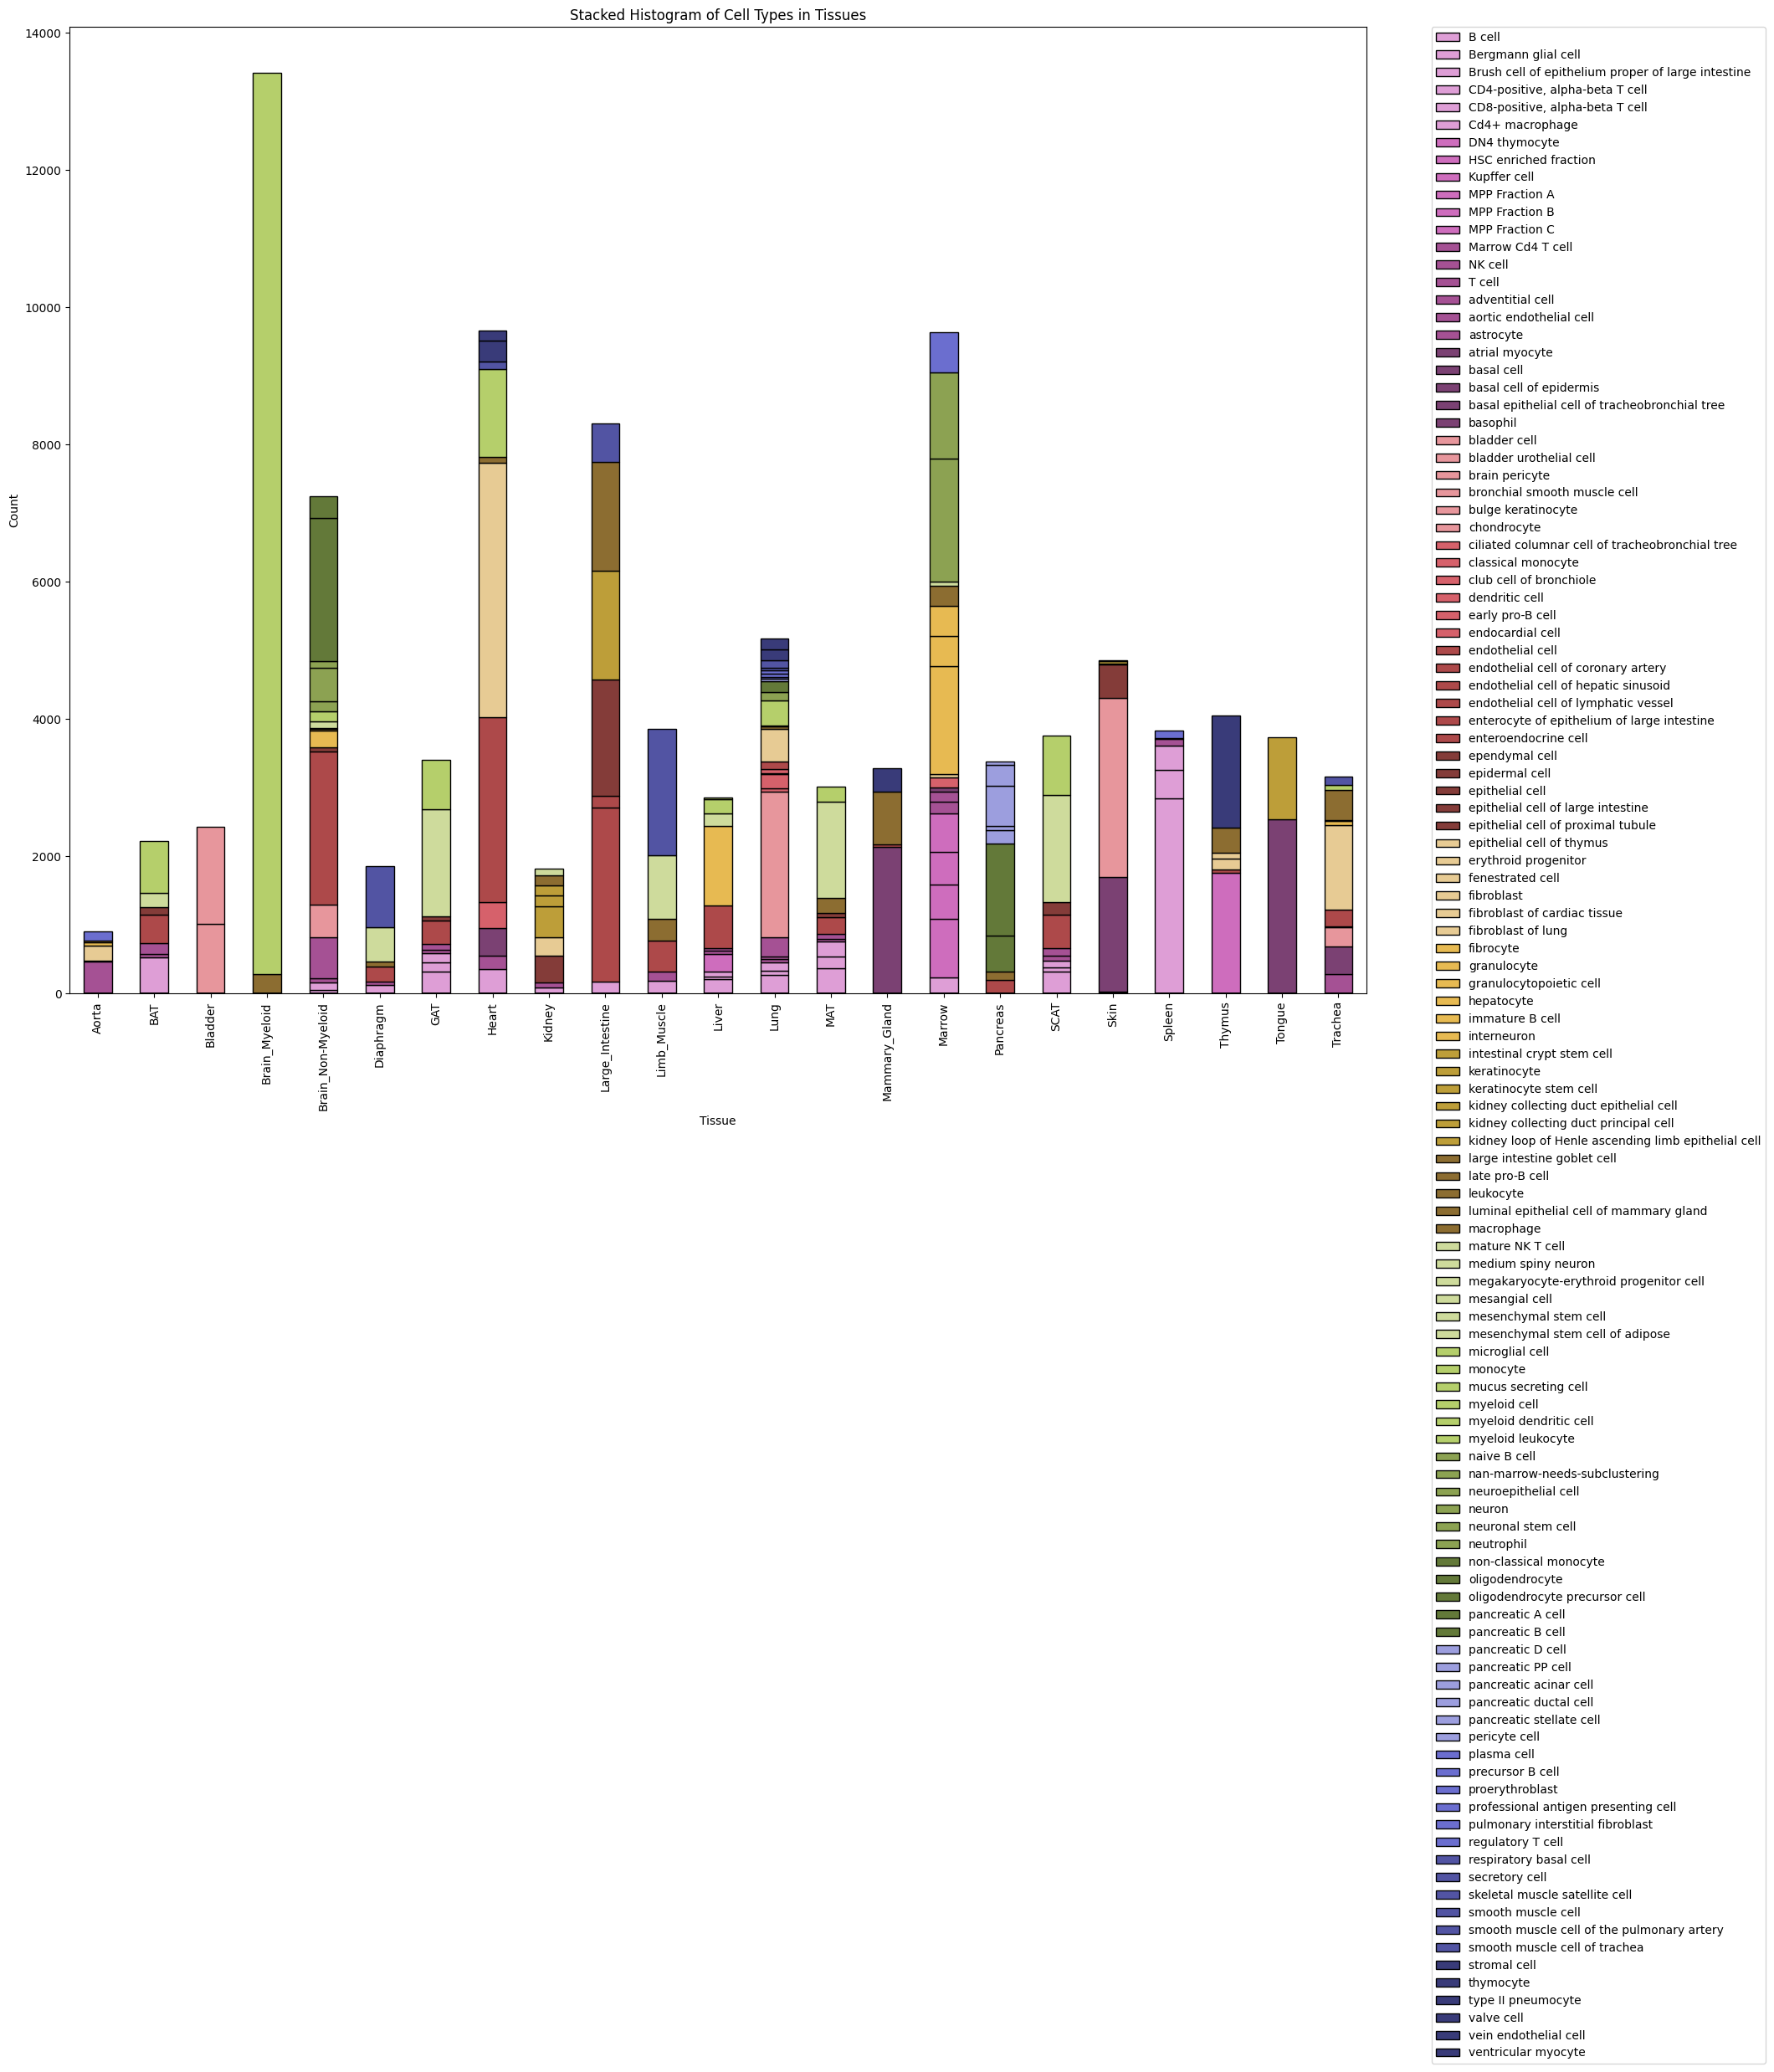

In [15]:
# Group by 'tissue' and 'cell type' and count
grouped_data = adata.obs.groupby(['tissue', 'cell_ontology_class_reannotated']).size().reset_index(name='count')

# Pivot the data
pivot_data = grouped_data.pivot(index='tissue', columns='cell_ontology_class_reannotated', values='count').fillna(0)
#pivot_data = grouped_data.pivot(columns='tissue', index='cell type', values='count').fillna(0)

cmap = plt.get_cmap('tab20b_r') 
colors = cmap(np.linspace(0, 1, len(pivot_data.columns)))

# Plot
pivot_data.plot(kind='bar', stacked=True, color = colors, edgecolor='black', figsize=(20, 15))
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.title('Stacked Histogram of Cell Types in Tissues')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

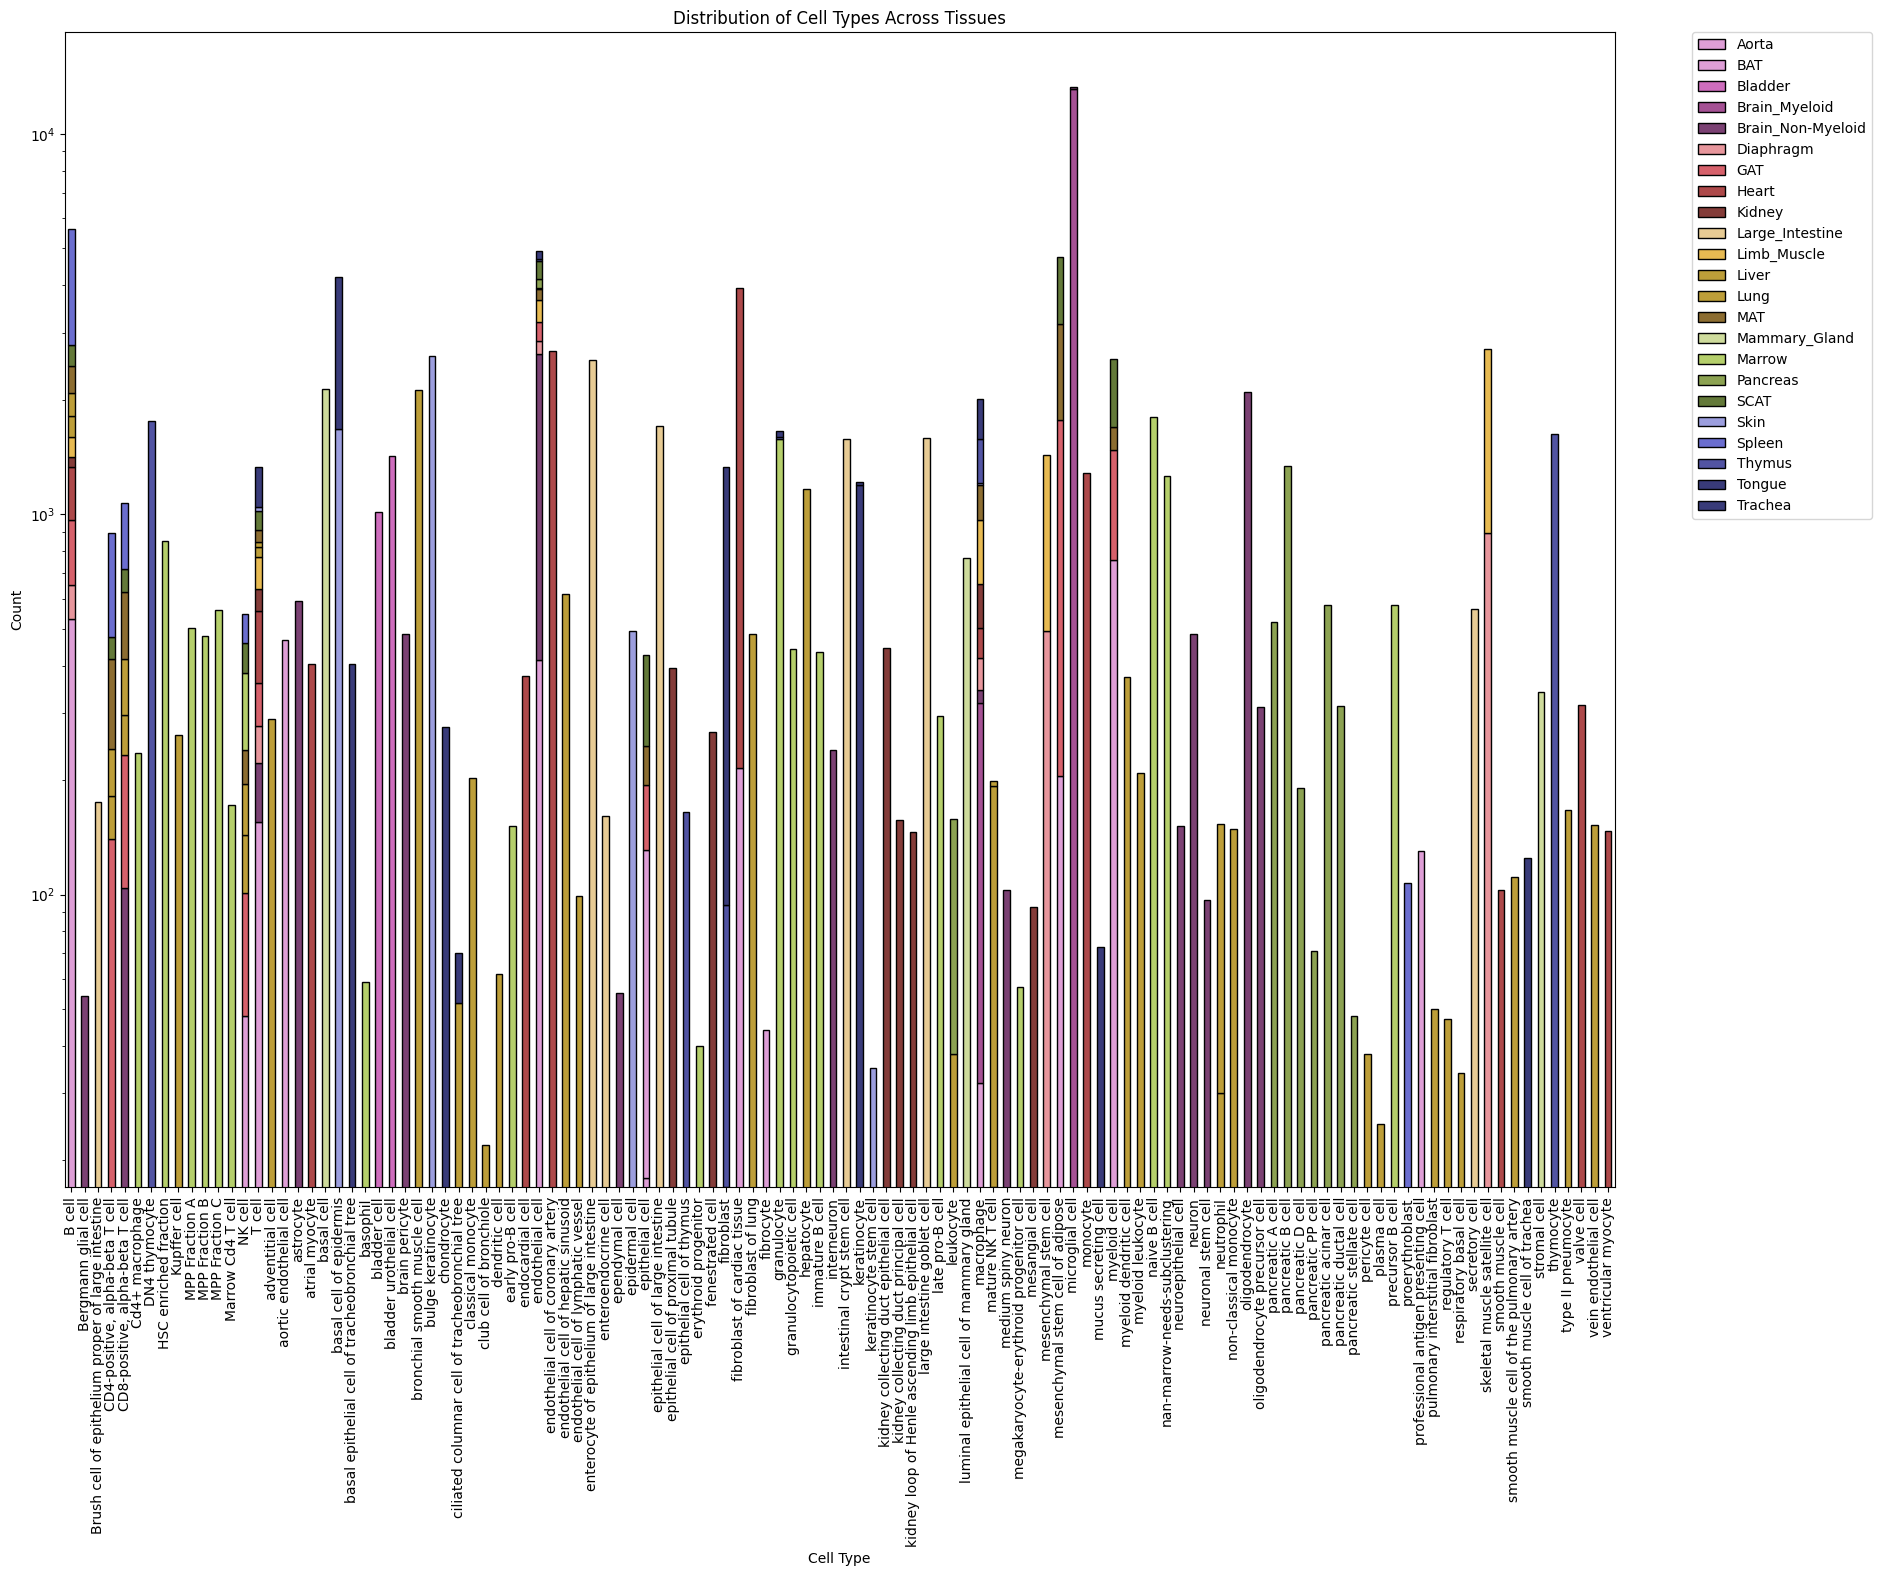

In [16]:
# Group by 'tissue' and 'cell type' and count
grouped_data = adata.obs.groupby(['tissue', 'cell_ontology_class_reannotated']).size().reset_index(name='count')

# Pivot the data
pivot_data = grouped_data.pivot(columns='tissue', index='cell_ontology_class_reannotated', values='count').fillna(0)

cmap = plt.get_cmap('tab20b_r') 
colors = cmap(np.linspace(0, 1, len(pivot_data.columns)))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_yscale('log')

# Plot using the axis object
pivot_data.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=ax)

plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.title('Distribution of Cell Types Across Tissues')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Statistics of the spilt 

In [17]:
train_tissues = ['BAT', 'Bladder', 'Brain_Myeloid', 'Brain_Non-Myeloid',
                         'Diaphragm', 'GAT', 'Heart', 'Kidney', 'Limb_Muscle', 'Liver', 'MAT', 'Mammary_Gland',
                         'SCAT', 'Spleen', 'Trachea']
val_tissues = ["Skin", "Lung", "Thymus", "Aorta"]
test_tissues = ["Large_Intestine", "Marrow", "Pancreas", "Tongue"]
split = {'train': train_tissues,
                 'val': val_tissues,
                 'test': test_tissues}

In [18]:
# Reverse the dictionary for easy lookup
tissue_to_split = {tissue: split_name for split_name, tissues in split.items() for tissue in tissues}

# Group by 'tissue' and 'cell type' and count
grouped_data = adata.obs.groupby(['tissue', 'cell_ontology_class_reannotated']).size().reset_index(name='count')

# Add a new column for the split category
grouped_data['split'] = grouped_data['tissue'].map(tissue_to_split)

grouped_data

,tissue,cell_ontology_class_reannotated,count,split
0,Aorta,B cell,0,val
1,Aorta,Bergmann glial cell,0,val
2,Aorta,Brush cell of epithelium proper of large intes...,0,val
3,Aorta,"CD4-positive, alpha-beta T cell",0,val
4,Aorta,"CD8-positive, alpha-beta T cell",0,val
...,...,...,...,...
2663,Trachea,thymocyte,0,train
2664,Trachea,type II pneumocyte,0,train
2665,Trachea,valve cell,0,train
2666,Trachea,vein endothelial cell,0,train


In [19]:
# Total cell count for 'train' split
train_cell_count = grouped_data.loc[grouped_data['split'] == 'train', 'count'].sum()

# Total cell count for 'val' split
val_cell_count = grouped_data.loc[grouped_data['split'] == 'val', 'count'].sum()

# Total cell count for 'test' split
test_cell_count = grouped_data.loc[grouped_data['split'] == 'test', 'count'].sum()

# Print the results
print("Total cells in train split:", train_cell_count)
print("Total cells in val split:", val_cell_count)
print("Total cells in test split:", test_cell_count)

Total cells in train split: 65830
Total cells in val split: 14986
Total cells in test split: 25065


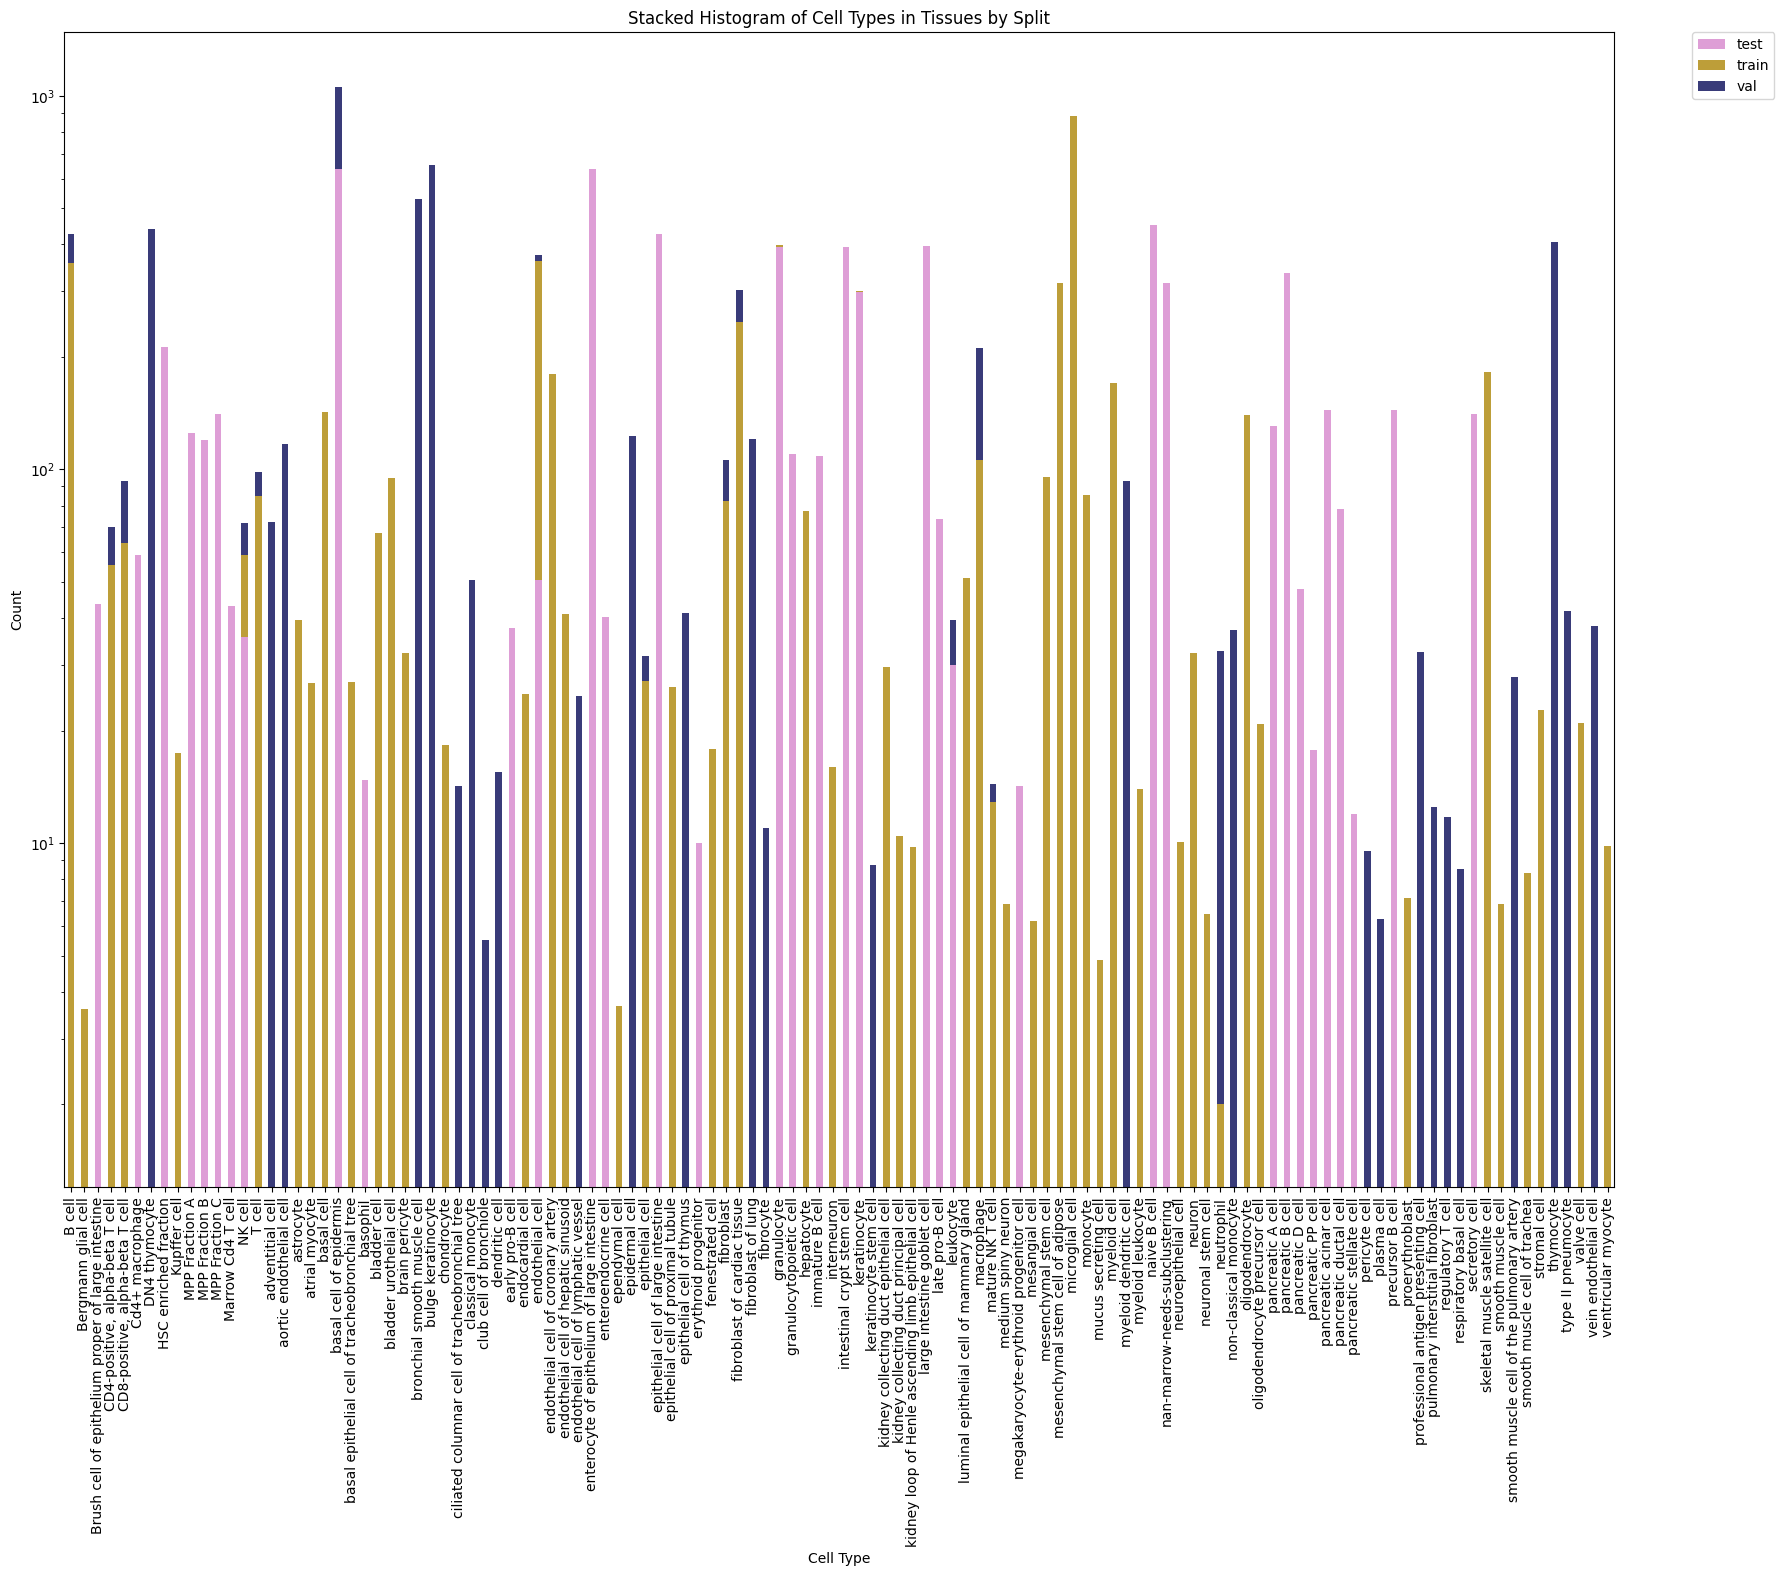

In [20]:
# Pivot the data
pivot_data = grouped_data.pivot_table(index='cell_ontology_class_reannotated', 
                                      columns=['split'], 
                                      values='count', 
                                      fill_value=0)

cmap = plt.get_cmap('tab20b_r') 
colors = cmap(np.linspace(0, 1, len(pivot_data.columns)))

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
pivot_data.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Cell Type')
ax.set_ylabel('Count')
ax.set_title('Stacked Histogram of Cell Types in Tissues by Split')

# Adjust legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()